<a href="https://colab.research.google.com/github/Pratikdate/ML-Models/blob/main/DL_Encoder_Decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import keras
from keras import layers

In [51]:
from keras.utils.vis_utils import plot_model

shape : (10000, 28, 28)


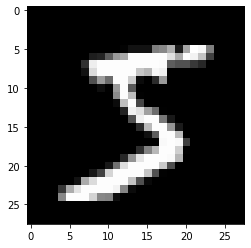

In [157]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

number=0
print('shape :',x_test.shape)
plt.imshow(x_train[number])

In [163]:
encoding_dim=32

input_img=keras.Input(shape=(784,))


encoded=layers.Dense(encoding_dim,activation='relu')(input_img)


decoded=layers.Dense(784,activation='sigmoid')(encoded)

seperate encoded layer

In [ ]:
#
encoder=Model(input_img,encoded)

In [164]:
autoencoded=Model(input_img,decoded)

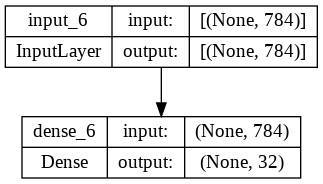

In [74]:
plot_model(encoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [93]:
encoder_img=encoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [94]:
encoder_img.shape

(10000, 32)

Decoder

In [73]:
decoder_input=keras.Input(shape=(encoding_dim,))
decoder_layer=autoencoded.layers[-1]

decoder=Model(decoder_input,decoder_layer(decoder_input))

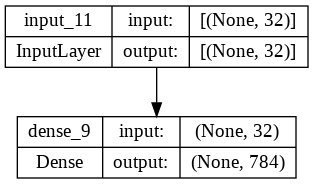

In [75]:
plot_model(decoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [95]:
decoder_img=decoder.predict(encoder_img)

313/313 [==============================] - 1s 2ms/step


In [97]:
decoder_img.shape

(10000, 784)

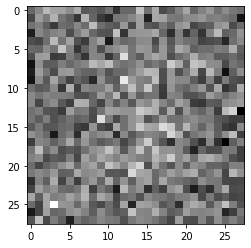

In [147]:
plt.imshow(decoder_img[0].reshape(28,28))
plt.gray()

auto encoded

In [165]:
autoencoded.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
 dense_11 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


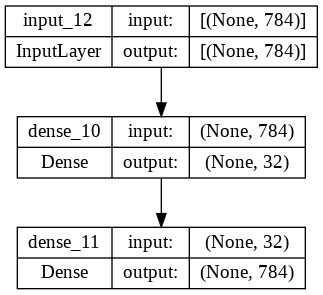

In [166]:
plot_model(autoencoded, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [167]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)



autoencoded.compile(optimizer='adam',loss='binary_crossentropy')
autoencoded.fit(x_train,x_train,validation_data=(x_test,x_test),epochs=50,batch_size=256)

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 4s 14ms/step - loss: 0.2748 - val_loss: 0.1846
Epoch 2/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1666 - val_loss: 0.1507
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1427 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1283 - val_loss: 0.1214
Epoch 5/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1184 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1114 - val_loss: 0.1073
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1063 - val_loss: 0.1030
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1025 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0996 - val_loss: 0.0972
Epoch 10/50
235/235 [==============================] - 3s 13ms/st

In [171]:
x_test=x_test.reshape(10000,784)

pre=autoencoded.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [177]:

x_test=x_test.reshape(10000,28,28)


#pre=autoencoded.predict(x_test)

m=3

predicted imag: AxesImage(54,36;334.8x217.44)


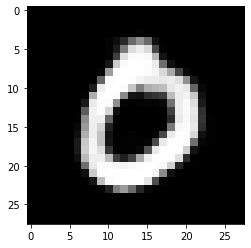

In [178]:
print('predicted imag:',plt.imshow(pre[m].reshape(28,28)*255.0))

actual imag : AxesImage(54,36;334.8x217.44)


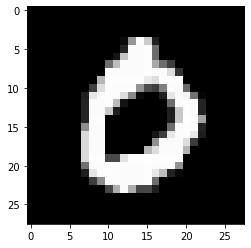

In [179]:
print('actual imag :',plt.imshow(x_test[m]))

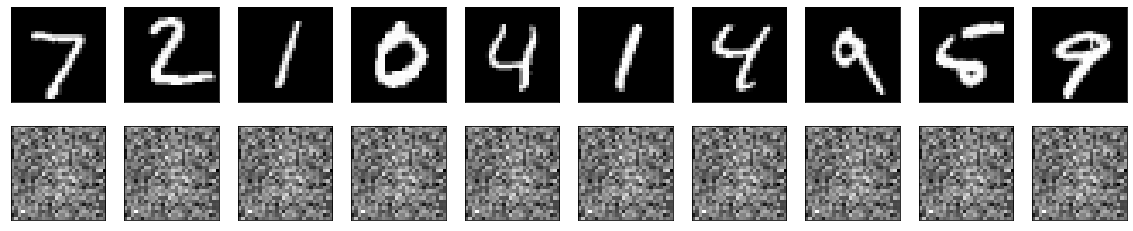

In [176]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoder_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()